In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = "Dataset/train"
data_test = "Dataset/test"
data_valid = "Dataset/validation"

In [3]:
img_width = 180
img_height = 180

In [4]:
def load_dataset(path,shuffle = False):
    data = tf.keras.utils.image_dataset_from_directory(
        path,
        shuffle = shuffle,
        image_size=(img_width,img_height),
        validation_split=False,
        batch_size = 32
    )
    return data


In [5]:
train = load_dataset(data_train, shuffle = True)
test = load_dataset(data_test, shuffle = False)
valid = load_dataset(data_valid, shuffle = False)

Found 2976 files belonging to 34 classes.
Found 339 files belonging to 34 classes.
Found 444 files belonging to 34 classes.


In [6]:
categories = train.class_names

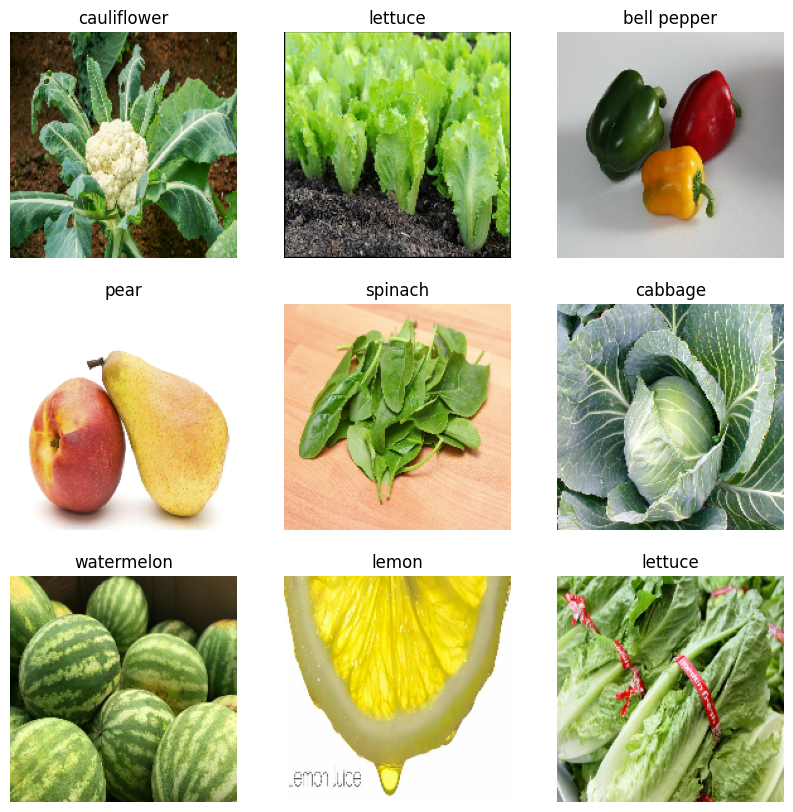

In [7]:
plt.figure(figsize=(10,10))
for image, labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(categories[labels[i]])
        plt.axis('off')

In [8]:
# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(len(categories))
])

# Model compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



In [9]:
# Training
batch_size = 32
epochs = 30

history = model.fit(
    train,
    validation_data=valid,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
    ]
)


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.0620 - loss: 3.6854 - val_accuracy: 0.3941 - val_loss: 2.2253 - learning_rate: 0.0010
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.2610 - loss: 2.5345 - val_accuracy: 0.4685 - val_loss: 1.8335 - learning_rate: 0.0010
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.3856 - loss: 2.0291 - val_accuracy: 0.6014 - val_loss: 1.3499 - learning_rate: 0.0010
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5224 - loss: 1.6160 - val_accuracy: 0.6667 - val_loss: 1.1494 - learning_rate: 0.0010
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6185 - loss: 1.2454 - val_accuracy: 0.7410 - val_loss: 1.0982 - learning_rate: 0.0010
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.7276 - loss: 0.8843 - val_accuracy: 0.7793 - val_loss: 0.9775 - learning_rate: 0.0010
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8288 - loss: 0.5846 - val_acc

In [10]:
def plot_history(history):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,1)
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel("Epochs")
    plt.title("Accuracy")
    plt.legend()
    
    plt.subplot(3,3,2)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel("Epochs")
    plt.title("Loss")
    plt.legend()
    
    plt.show()

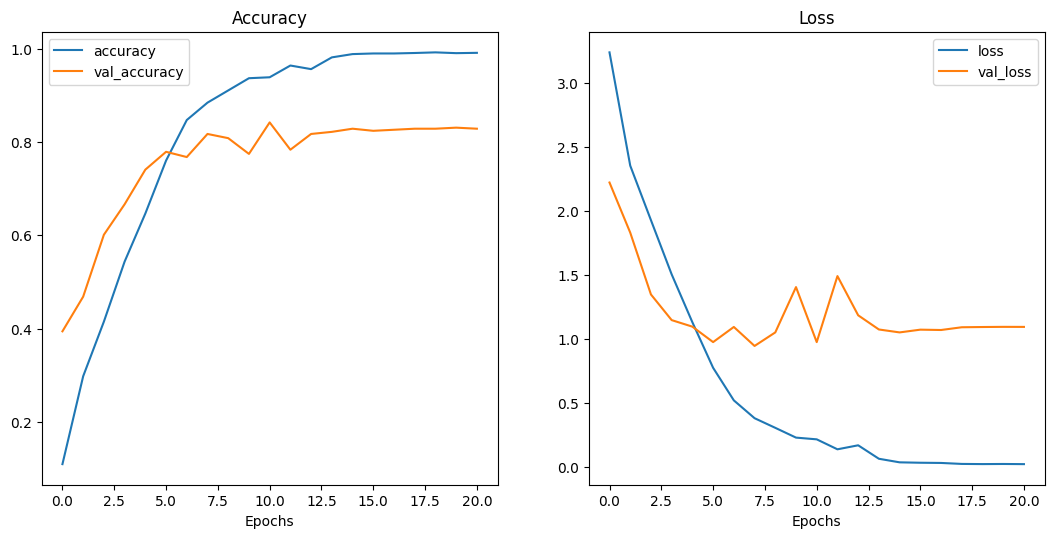

In [11]:
plot_history(history)

In [100]:
image = 'apple.jpeg'
image = tf.keras.utils.load_img(image, target_size= (img_height,img_width)) 
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [101]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [102]:
score = tf.nn.softmax(predict)

In [103]:
print(f'Vegetable or Fruit in image is {categories[np.argmax(score)]} with accuracy of {np.max(score) * 100:.2f}%')

Vegetable or Fruit in image is apple with accuracy of 99.20%


In [104]:
model.save("Fruit_and_Vegetable_Identifier.keras")

In [113]:
categories[:]

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']